<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np

A = np.random.randn(10,3)
A

array([[ 0.91460372,  1.03012626,  0.51315917],
       [ 0.69275727, -0.71594782, -0.54465508],
       [-1.14622379,  0.04470457, -0.45015959],
       [-0.2698244 ,  0.63185977, -0.16820177],
       [ 1.17720829,  0.8254405 , -1.10728906],
       [ 1.32764398, -0.71994426, -0.60345557],
       [-1.6091692 , -0.41965461,  0.24933793],
       [-0.88266353, -0.31186593,  0.49648684],
       [ 2.28669465, -0.89289631,  0.5152982 ],
       [ 0.01417774,  2.75899749,  0.60861656]])

In [52]:
value, vector = np.linalg.eig(A)
value

LinAlgError: ignored

In [53]:
u, sig, v_t = np.linalg.svd(A, full_matrices=False)

print("u  :" + str(u.shape))
print("sig:" + str(sig.shape))
print("v_t:" + str(v_t.shape))

u  :(10, 3)
sig:(3,)
v_t:(3, 3)


In [54]:
sig

array([3.85478411, 3.42301949, 1.74811755])

In [55]:
s = np.diag(sig)
s

array([[3.85478411, 0.        , 0.        ],
       [0.        , 3.42301949, 0.        ],
       [0.        , 0.        , 1.74811755]])

In [56]:
u_s = np.matmul(u, s)
u_s

array([[-0.48202925, -1.31504207,  0.4464354 ],
       [-0.9414745 ,  0.50711907, -0.38157449],
       [ 1.03910467,  0.37057181, -0.54900741],
       [ 0.42807984, -0.49173002, -0.27439579],
       [-0.99403598, -1.04333792, -1.10299541],
       [-1.54891667,  0.31331425, -0.38445839],
       [ 1.41981247,  0.88592542,  0.16423652],
       [ 0.79834856,  0.52667674,  0.45618596],
       [-2.36786598,  0.05624042,  0.82572162],
       [ 0.91124951, -2.66445118,  0.23023142]])

In [57]:
AA = np.matmul(u_s, v_t)
AA

array([[ 0.91460372,  1.03012626,  0.51315917],
       [ 0.69275727, -0.71594782, -0.54465508],
       [-1.14622379,  0.04470457, -0.45015959],
       [-0.2698244 ,  0.63185977, -0.16820177],
       [ 1.17720829,  0.8254405 , -1.10728906],
       [ 1.32764398, -0.71994426, -0.60345557],
       [-1.6091692 , -0.41965461,  0.24933793],
       [-0.88266353, -0.31186593,  0.49648684],
       [ 2.28669465, -0.89289631,  0.5152982 ],
       [ 0.01417774,  2.75899749,  0.60861656]])

In [58]:
A_t = np.transpose(A)
A_t



array([[ 0.91460372,  0.69275727, -1.14622379, -0.2698244 ,  1.17720829,
         1.32764398, -1.6091692 , -0.88266353,  2.28669465,  0.01417774],
       [ 1.03012626, -0.71594782,  0.04470457,  0.63185977,  0.8254405 ,
        -0.71994426, -0.41965461, -0.31186593, -0.89289631,  2.75899749],
       [ 0.51315917, -0.54465508, -0.45015959, -0.16820177, -1.10728906,
        -0.60345557,  0.24933793,  0.49648684,  0.5152982 ,  0.60861656]])

In [59]:

AAt = np.matmul(A, A_t)
AtA = np.matmul(A_t, A)

print(AAt)
print(AtA)

[[ 2.16099241 -0.38341302 -1.23329271  0.31779866  1.35877148  0.16296588
  -1.77609934 -0.87377187  1.43605351  3.16739994]
 [-0.38341302  1.28914307 -0.5808793  -0.54768949  0.82763789  1.76385269
  -0.95011603 -0.65860593  1.94273174 -2.2969626 ]
 [-1.23329271 -0.5808793   1.51847112  0.4132438  -0.81398639 -1.2823106
   1.71346568  0.7742898  -2.89294678 -0.16688563]
 [ 0.31779866 -0.54768949  0.4132438   0.50034381  0.39017111 -0.71163226
   0.12709116 -0.04240134 -1.26786534  1.63710364]
 [ 1.35877148  0.82763789 -0.81398639  0.39017111  3.29326044  1.6368421
  -2.5168164  -1.84626004  1.38429906  1.62016397]
 [ 0.16296588  1.76385269 -1.2823106  -0.71163226  1.6368421   2.64511692
  -1.98474024 -1.24694459  3.36779241 -2.33477448]
 [-1.77609934 -0.95011603  1.71346568  0.12709116 -2.5168164  -1.98474024
   2.82770492  1.67502395 -3.17648717 -1.02888922]
 [-0.87377187 -0.65860593  0.7742898  -0.04240134 -1.84626004 -1.24694459
   1.67502395  1.12285445 -1.48407927 -0.57078139]
 [

In [60]:
u_eig, u_vec = np.linalg.eig(AAt)
u_eig, u_vec

(array([ 1.48593605e+01+0.00000000e+00j,  1.17170624e+01+0.00000000e+00j,
         3.05591495e+00+0.00000000e+00j,  1.42580700e-15+0.00000000e+00j,
        -7.21942565e-16+0.00000000e+00j, -4.06451362e-16+0.00000000e+00j,
         1.75092191e-16+3.14208382e-16j,  1.75092191e-16-3.14208382e-16j,
         4.32216108e-16+0.00000000e+00j,  2.97358546e-16+0.00000000e+00j]),
 array([[ 0.12504702+0.j        , -0.38417604+0.j        ,
          0.25538065+0.j        ,  0.6247884 +0.j        ,
          0.02240291+0.j        ,  0.08694915+0.j        ,
         -0.0265091 -0.03219509j, -0.0265091 +0.03219509j,
          0.05436648+0.j        , -0.0812656 +0.j        ],
        [ 0.24423534+0.j        ,  0.14814963+0.j        ,
         -0.21827736+0.j        ,  0.63341119+0.j        ,
         -0.84765587+0.j        , -0.74932705+0.j        ,
         -0.2469121 +0.22222962j, -0.2469121 -0.22222962j,
         -0.21854764+0.j        ,  0.11335958+0.j        ],
        [-0.26956235+0.j        ,  0

In [50]:
v_eig, v_vec = np.linalg.eig(AtA)
v_eig, v_vec

(array([19.71592787,  3.15166943, 10.56672799]),
 array([[-0.71890286,  0.67599232, -0.16190448],
        [ 0.31622724,  0.52547655,  0.78985741],
        [-0.61901455, -0.51663214,  0.59153378]]))

In [ ]:
from sklearn.decomposition import TruncatedSVD

my_svd = TruncatedSVD(n_components=2)

my_svd.fit(A)

TruncatedSVD()

In [ ]:
print(my_svd.singular_values_)

[2.62963933 1.79075307]


In [ ]:
A_2 = my_svd.transform(A)
A_2

array([[-0.85242248,  1.03904655],
       [ 1.64197585, -0.71426867],
       [-0.53874287, -0.85231631],
       [ 1.5074254 ,  0.91611666],
       [ 0.96421938,  0.22646473]])

In [ ]:
print( s[:2,:2] )
A_3 = np.matmul(u, s[:,:2])
print(A_3)
A_4 = np.matmul(A_3, v_t[:2,:])
print(A_4)

[[2.62963933 0.        ]
 [0.         1.79075307]]
[[ 0.85242248 -1.03904655]
 [-1.64197585  0.71426867]
 [ 0.53874287  0.85231631]
 [-1.5074254  -0.91611666]
 [-0.96421938 -0.22646473]]
[[ 0.7206479  -0.53844003 -0.99849425]
 [-0.25499495  1.17354275  1.32817145]
 [-0.87296284 -0.50017703  0.06667668]
 [ 1.14964869  1.2439116   0.4925372 ]
 [ 0.41886784  0.75757286  0.48128826]]


In [ ]:
 from sklearn.datasets import load_iris
 from sklearn.decomposition import TruncatedSVD 

In [ ]:
 iris = load_iris()
 X = iris.data
 Y = iris.target
 X[:10] 

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
SVD_2=TruncatedSVD(2)

In [ ]:
 X_truncated = SVD_2.fit_transform(X)
 X_truncated[:10] 

array([[5.91274714, 2.30203322],
       [5.57248242, 1.97182599],
       [5.44697714, 2.09520636],
       [5.43645948, 1.87038151],
       [5.87564494, 2.32829018],
       [6.47759822, 2.32464996],
       [5.5159752 , 2.07090423],
       [5.85092859, 2.14807482],
       [5.15891972, 1.77506408],
       [5.64500117, 1.99000106]])

In [74]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# TruncatedSVD is added by aidentify

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD 
from sklearn.manifold import TSNE


# import some data to play with
iris = datasets.load_iris()

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

([], <a list of 0 Text major ticklabel objects>)

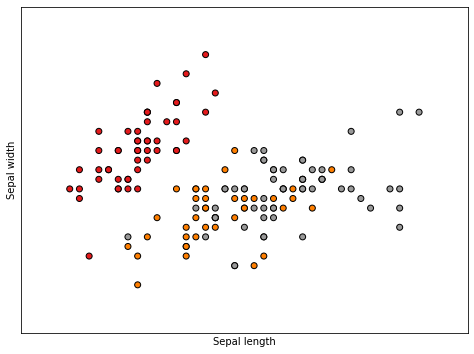

In [76]:

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



<Figure size 576x432 with 0 Axes>

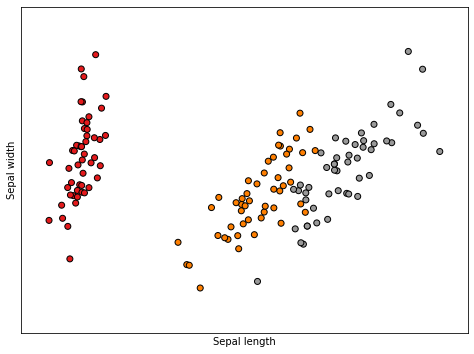

In [88]:

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)

X_reduced1 = PCA(n_components=2).fit_transform(iris.data)


x_min, x_max = X_reduced1[:, 0].min() - 0.5, X_reduced1[:, 0].max() + 0.5
y_min, y_max = X_reduced1[:, 1].min() - 0.5, X_reduced1[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced1[:, 0], X_reduced1[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

'''
ax.scatter(
    X_reduced1[:, 0],
    X_reduced1[:, 1],
    X_reduced1[:, 2],
    c=y,
    cmap='Greens',
    edgecolor="k",
    s=70,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
'''

plt.show()

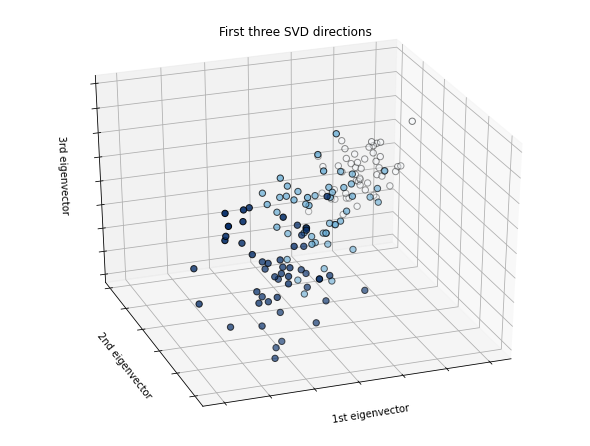

In [79]:

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced2 = TruncatedSVD(n_components=3).fit_transform(iris.data)


ax.scatter(
    X_reduced2[:, 0],
    X_reduced2[:, 1],
    X_reduced2[:, 2],
    c=y,
    cmap='Blues',
    edgecolor="k",
    s=40,
)


ax.set_title("First three SVD directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


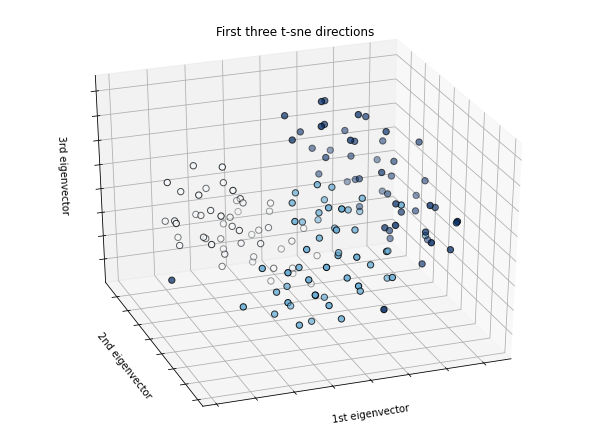

In [84]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced3 = TSNE(n_components=3, n_iter=10000).fit_transform(iris.data)

ax.scatter(
    X_reduced3[:, 0],
    X_reduced3[:, 1],
    X_reduced3[:, 2],
    c=y,
    cmap='Blues',
    edgecolor="k",
    s=40,
)


ax.set_title("First three t-sne directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()